In [45]:
import numpy as np
import pandas as pd
import pickle

from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import load_img, img_to_array
from keras.models import Model

from PIL import Image

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [102]:
# sample image
smpl_path = "../data/yelp_photos/photos/ZzZDx9p-AbZiMcl1OPyR-g.jpg"

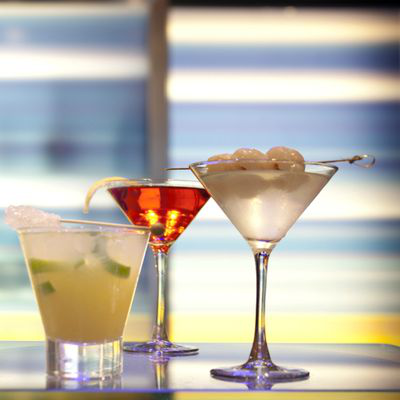

In [103]:
# sample image we're working with
Image.open(smpl_path)

In [104]:
img = load_img(smpl_path, target_size = (224,224))
# preprocess to be compatible with VGG16 network
img = img_to_array(img)
img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))
img = preprocess_input(img)

In [61]:
model = VGG16()

In [105]:
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(img)

In [79]:
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size): 
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1

In [111]:
activations[2].shape


(1, 224, 224, 64)

In [112]:
def save_activations(activations, act_index, path):
    activation = activations[act_index][0]
    i = 0
    for i in range(activation.shape[-1]):
        fname = "%s/activation%d_pic%d.jpg"%(path,act_index,i)
        plt.imsave(fname,activation[:,:,i],cmap = 'gray')
        i += 1

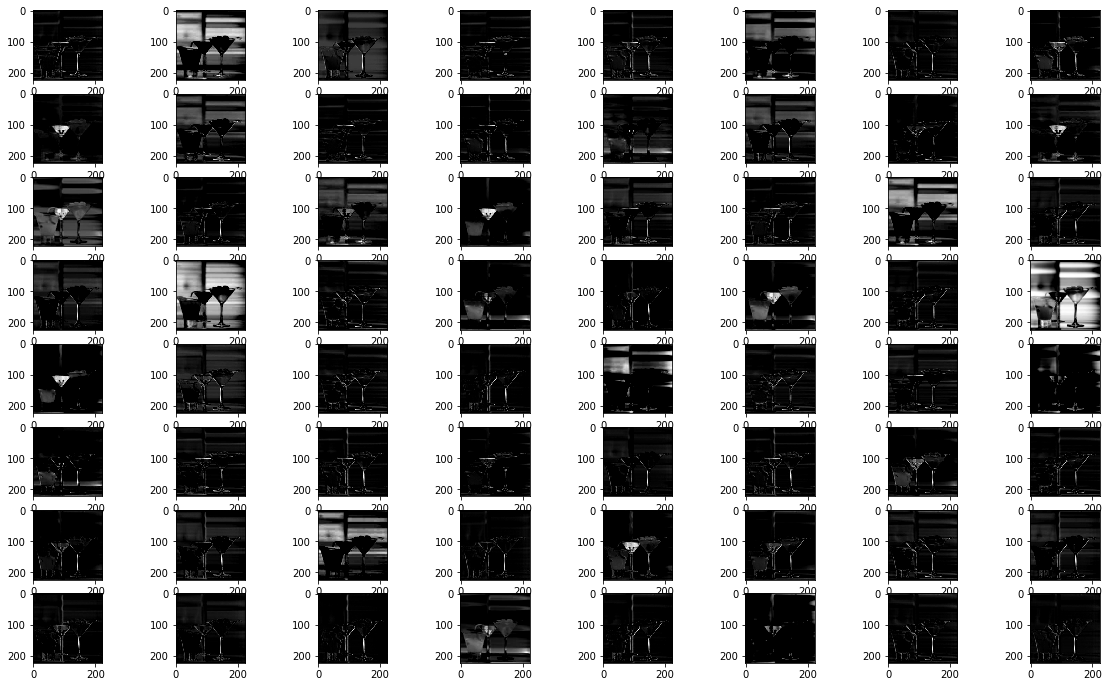

In [106]:
display_activation(activations,8,8,1)

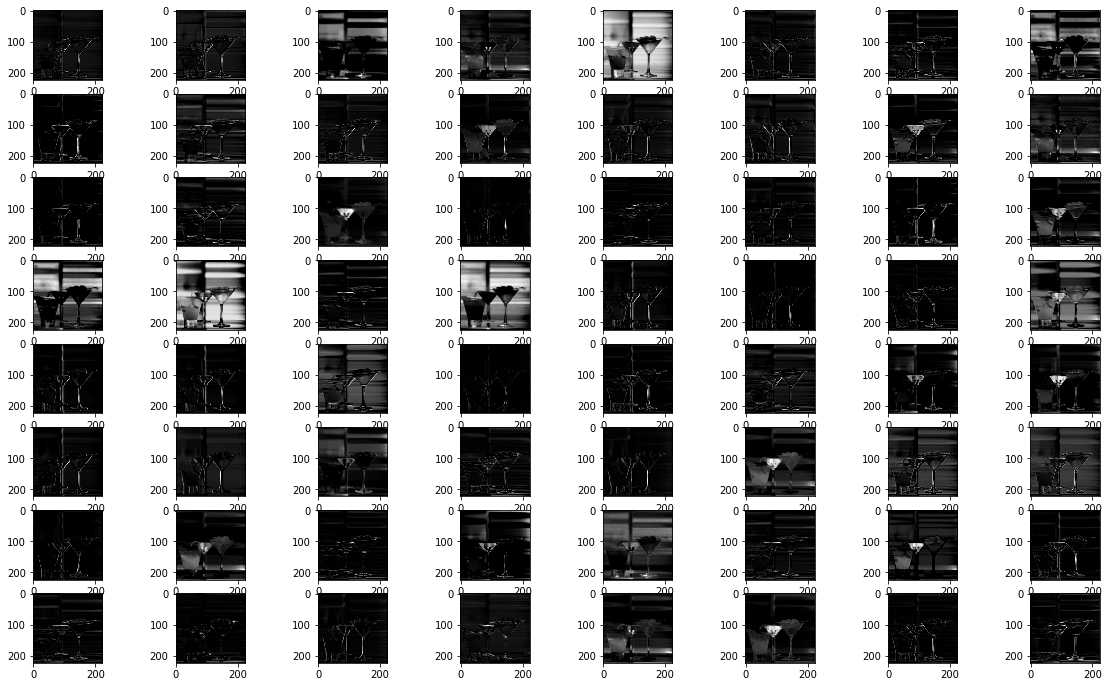

In [107]:
display_activation(activations,8,8,2)

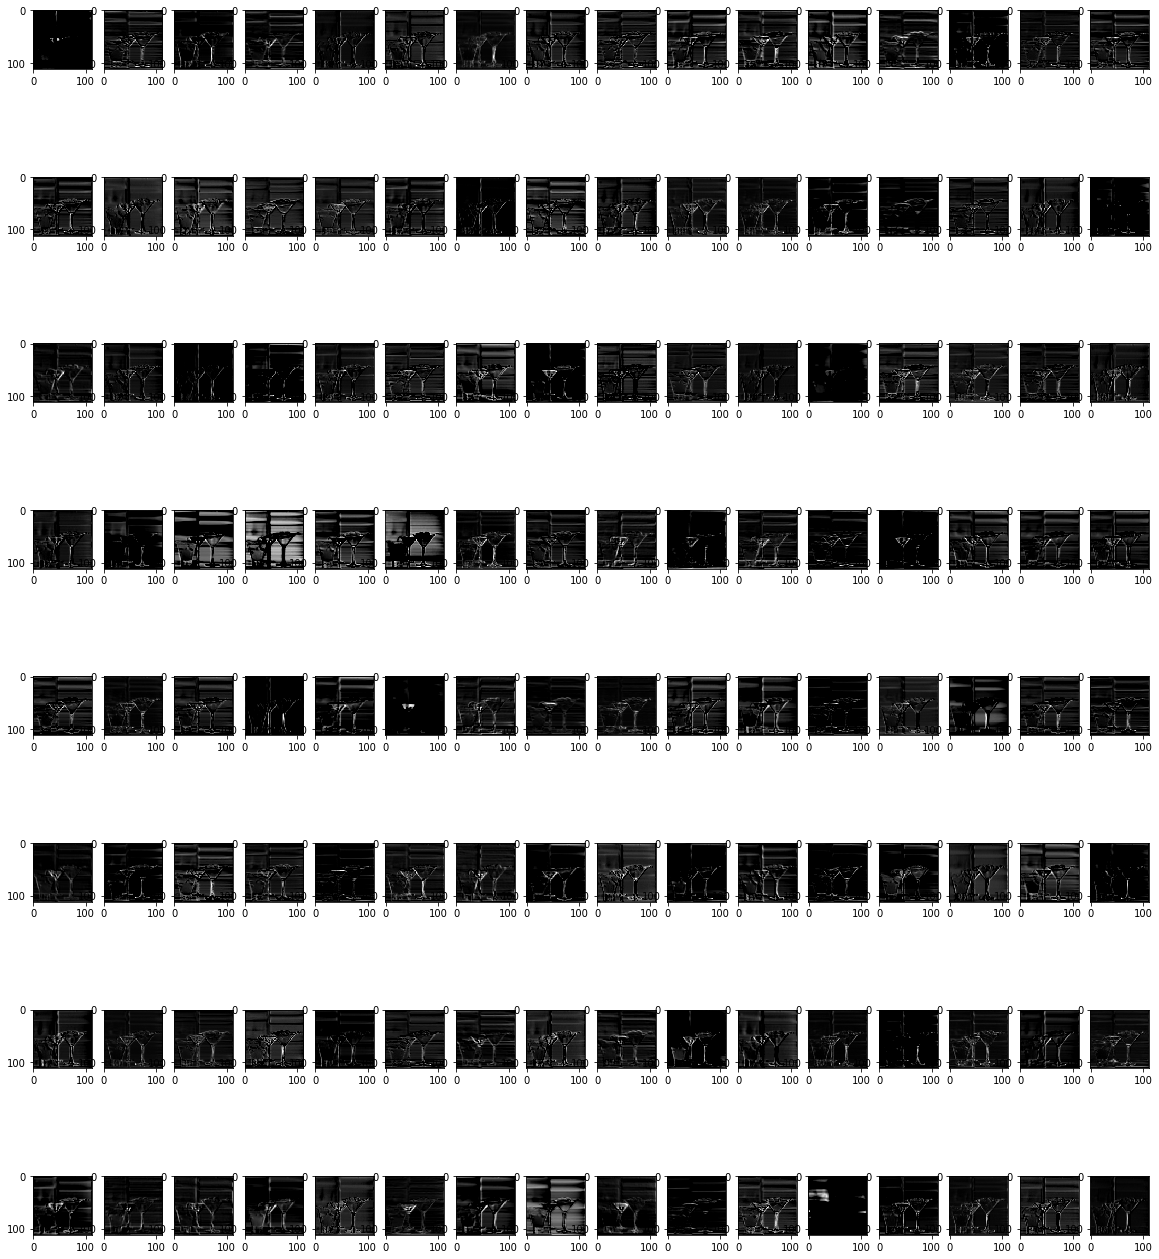

In [108]:
display_activation(activations,16,8,4)

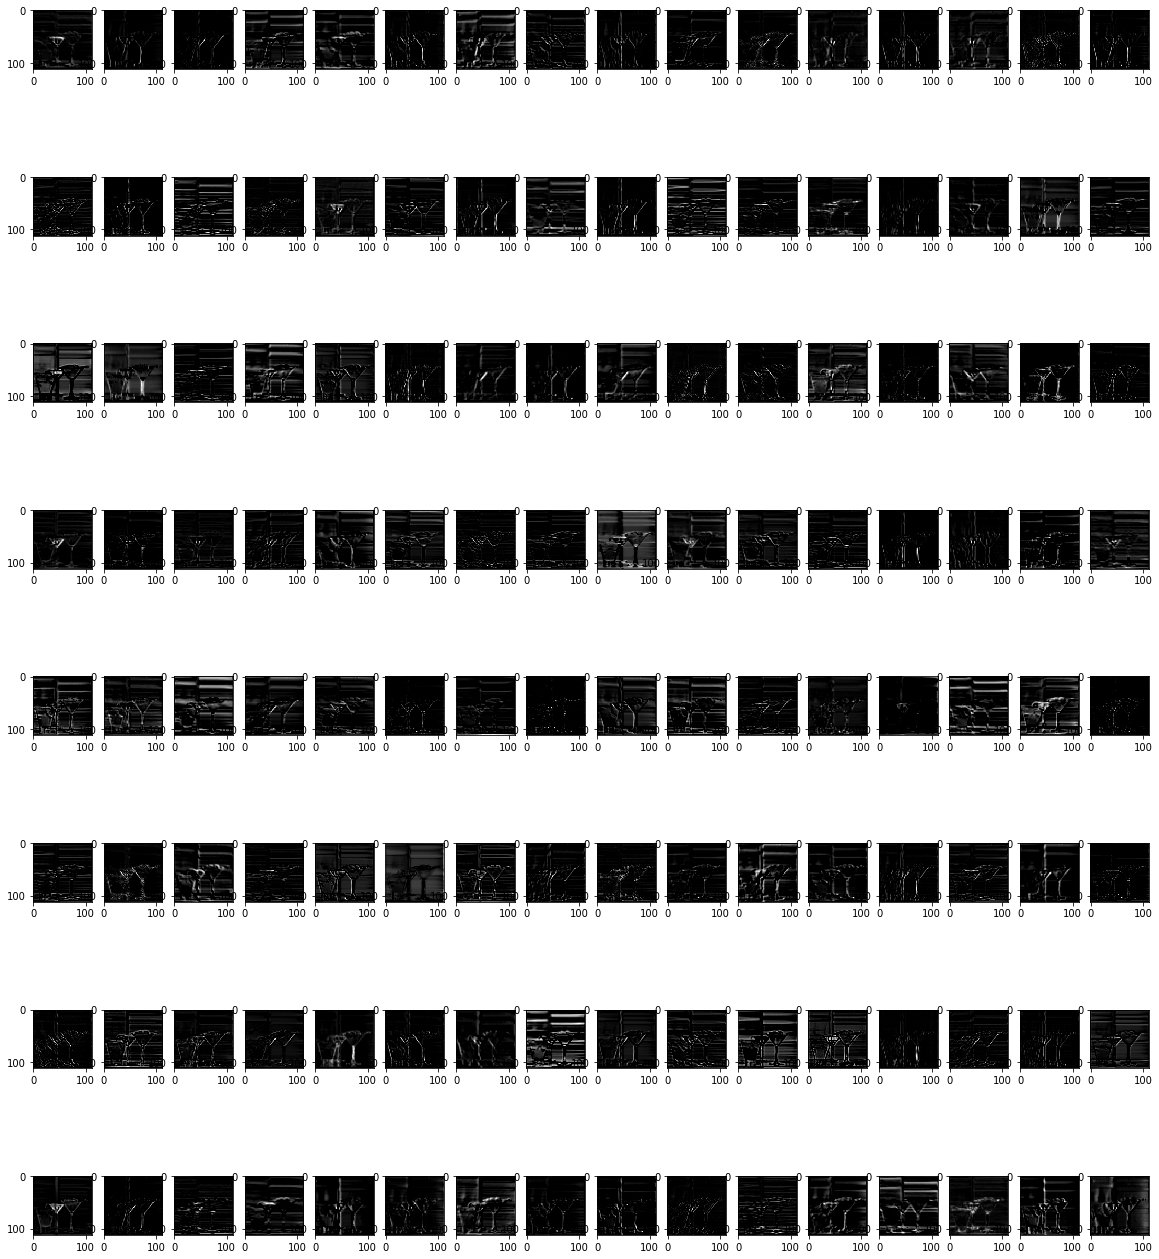

In [109]:
display_activation(activations,16,8,5)

In [132]:
mkdir activation_viz/vgg_act0

mkdir: activation_viz/vgg_act0: File exists


In [123]:
save_activations(activations,0,"vgg_act0")

In [133]:
mkdir activation_viz/vgg_act1

In [134]:
save_activations(activations,1,"activation_viz/vgg_act1")

In [135]:
mkdir activation_viz/vgg_act4

mkdir: activation_viz/vgg_act4: File exists


In [ ]:
save_activations(activations,4,"activation_viz/vgg_act4")

In [138]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________